In [17]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno

from core.src.constants import FORMATTED_CSV

In [18]:
sns.set(rc={"figure.figsize": (10, 10)})
plt.figure(figsize=(10, 8))
df = pd.read_csv(FORMATTED_CSV)

<Figure size 1000x800 with 0 Axes>

ValueError: keyword grid_b is not recognized; valid keywords are ['size', 'width', 'color', 'tickdir', 'pad', 'labelsize', 'labelcolor', 'labelfontfamily', 'zorder', 'gridOn', 'tick1On', 'tick2On', 'label1On', 'label2On', 'length', 'direction', 'left', 'bottom', 'right', 'top', 'labelleft', 'labelbottom', 'labelright', 'labeltop', 'labelrotation', 'grid_agg_filter', 'grid_alpha', 'grid_animated', 'grid_antialiased', 'grid_clip_box', 'grid_clip_on', 'grid_clip_path', 'grid_color', 'grid_dash_capstyle', 'grid_dash_joinstyle', 'grid_dashes', 'grid_data', 'grid_drawstyle', 'grid_figure', 'grid_fillstyle', 'grid_gapcolor', 'grid_gid', 'grid_in_layout', 'grid_label', 'grid_linestyle', 'grid_linewidth', 'grid_marker', 'grid_markeredgecolor', 'grid_markeredgewidth', 'grid_markerfacecolor', 'grid_markerfacecoloralt', 'grid_markersize', 'grid_markevery', 'grid_mouseover', 'grid_path_effects', 'grid_picker', 'grid_pickradius', 'grid_rasterized', 'grid_sketch_params', 'grid_snap', 'grid_solid_capstyle', 'grid_solid_joinstyle', 'grid_transform', 'grid_url', 'grid_visible', 'grid_xdata', 'grid_ydata', 'grid_zorder', 'grid_aa', 'grid_c', 'grid_ds', 'grid_ls', 'grid_lw', 'grid_mec', 'grid_mew', 'grid_mfc', 'grid_mfcalt', 'grid_ms']

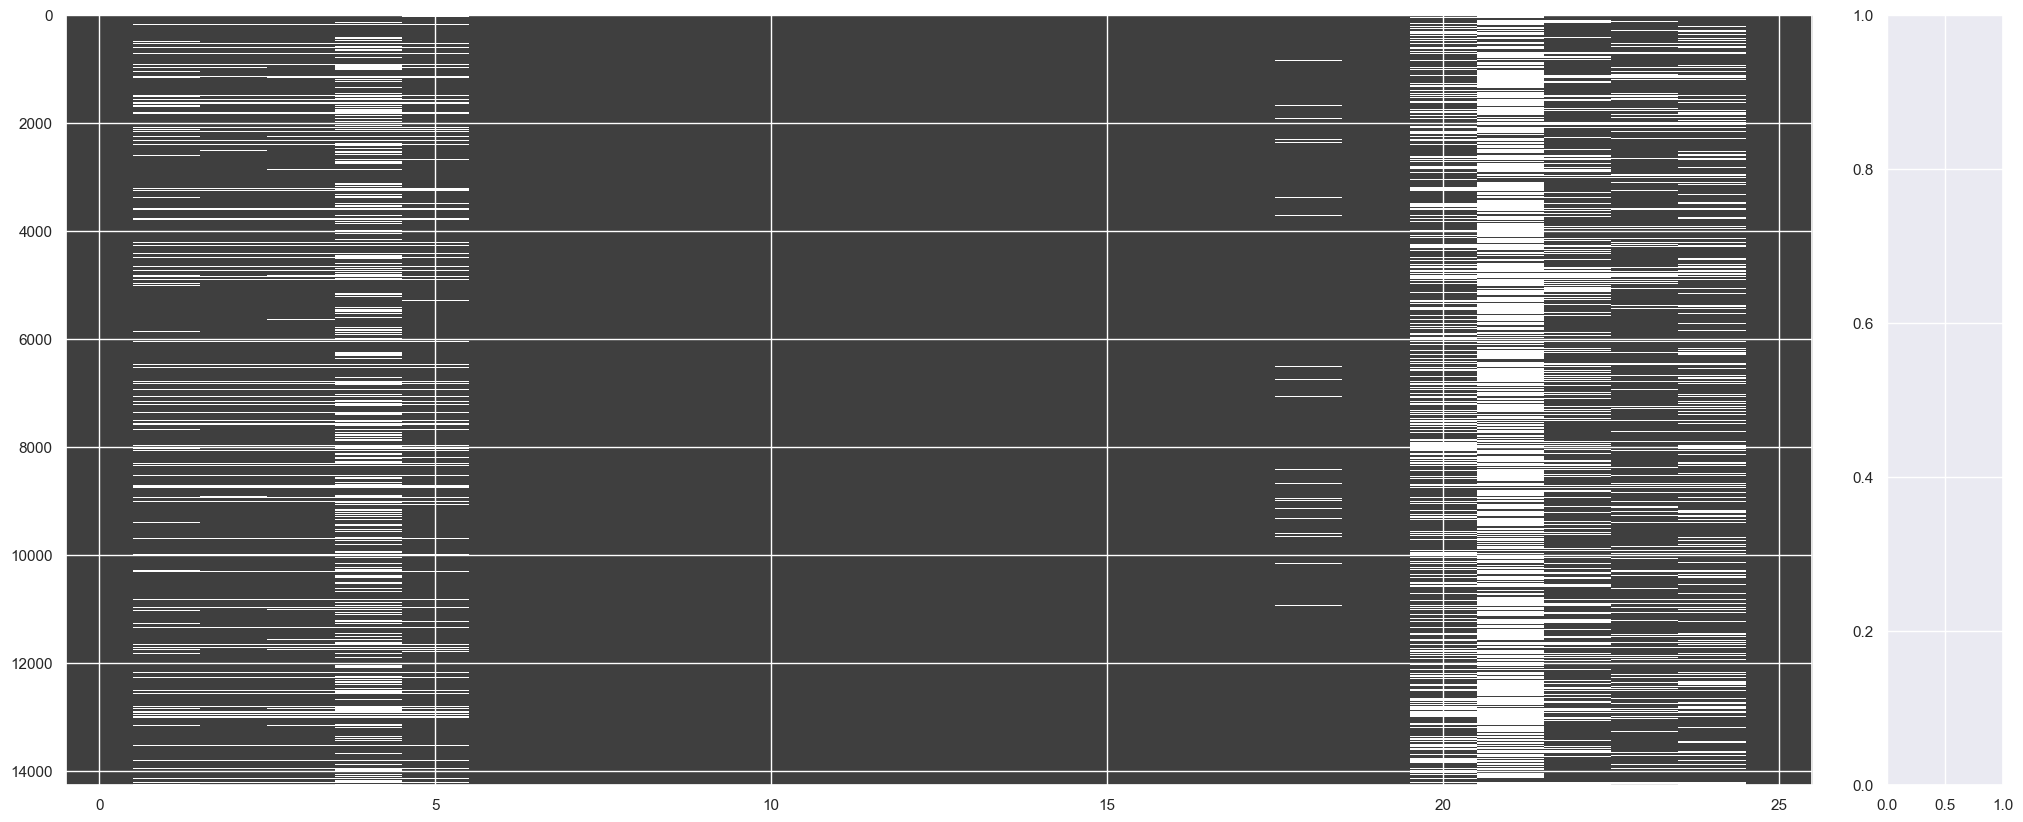

In [19]:
msno.matrix(df)

<Axes: >

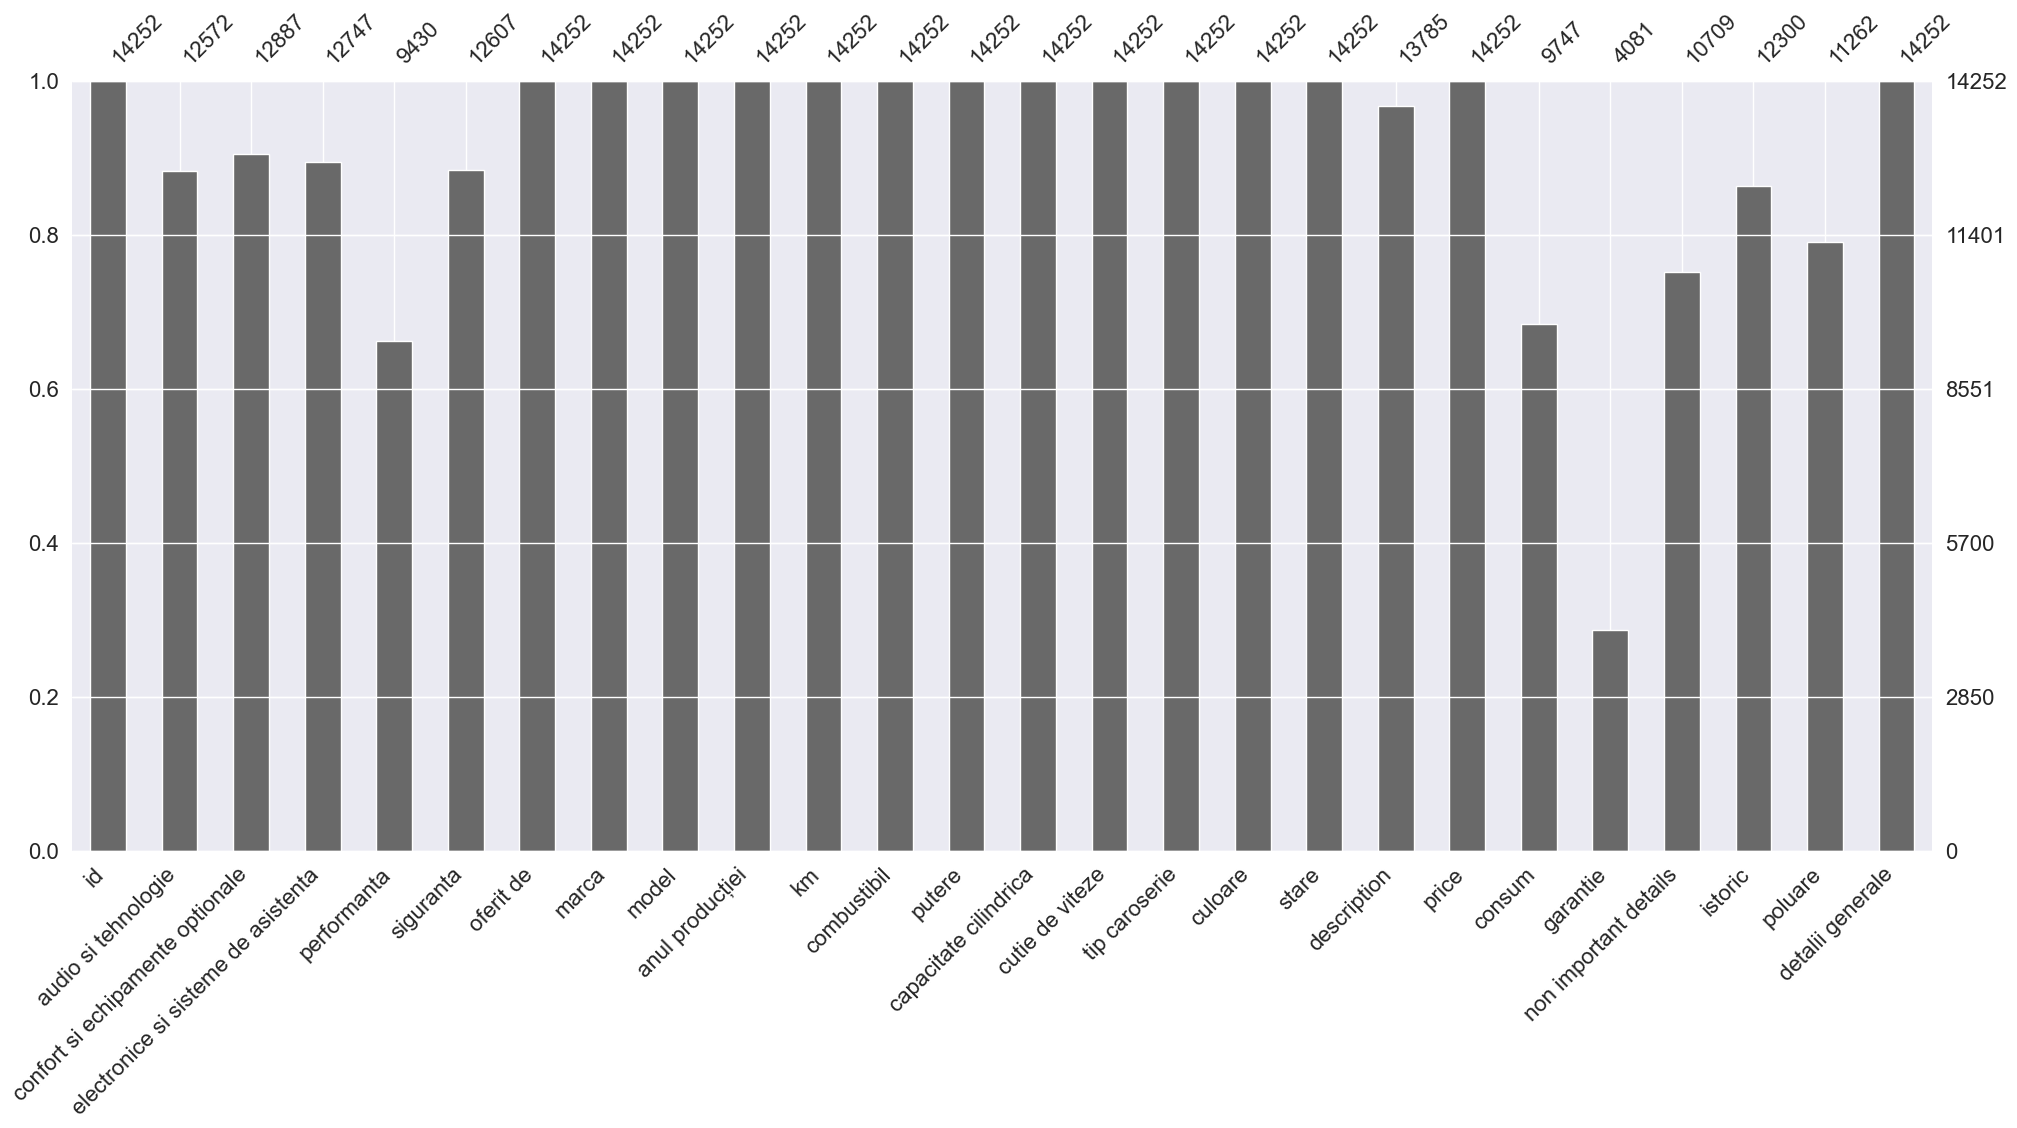

In [20]:
msno.bar(df)

marca: marca
bmw              1975
mercedes-benz    1838
volkswagen       1660
audi             1316
ford              920
                 ... 
infiniti            2
iveco               1
rover               1
saab                1
lotus               1
Name: count, Length: 63, dtype: int64


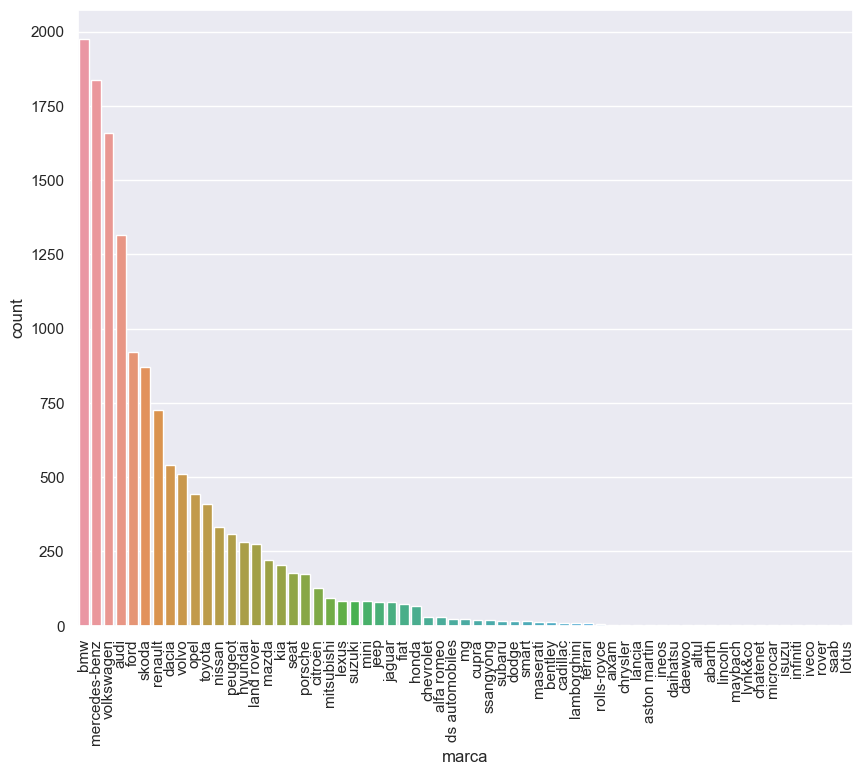

cutie de viteze: cutie de viteze
automata    8887
manuala     5365
Name: count, dtype: int64


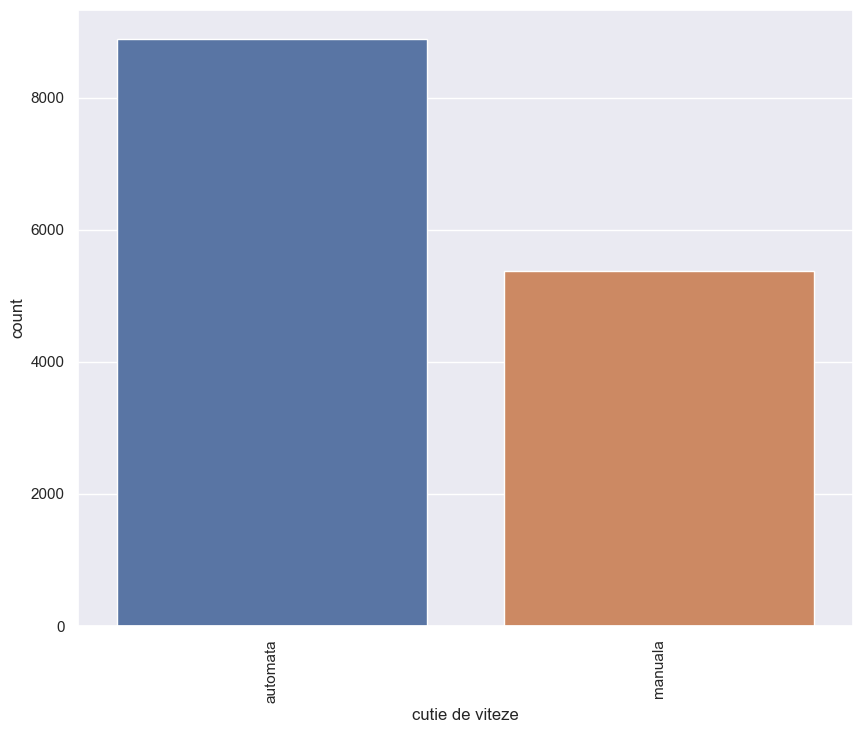

tip caroserie: tip caroserie
suv               5573
sedan             3263
combi             1857
compacta          1331
monovolum          839
masina de oras     659
coupe              396
masina mica        202
cabrio             132
Name: count, dtype: int64


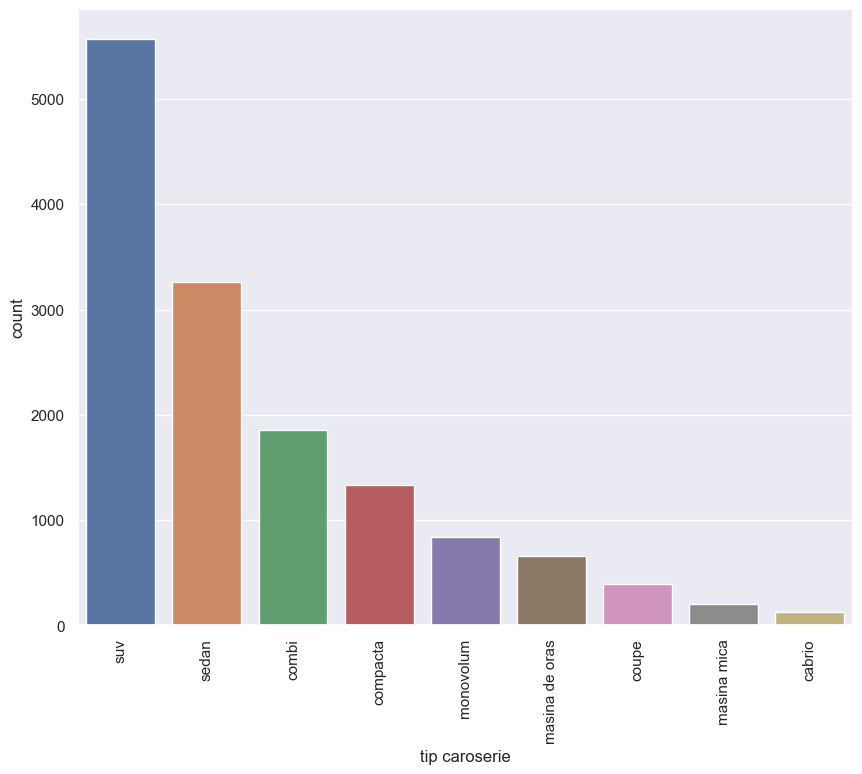

stare: stare
second hand    13610
nou              642
Name: count, dtype: int64


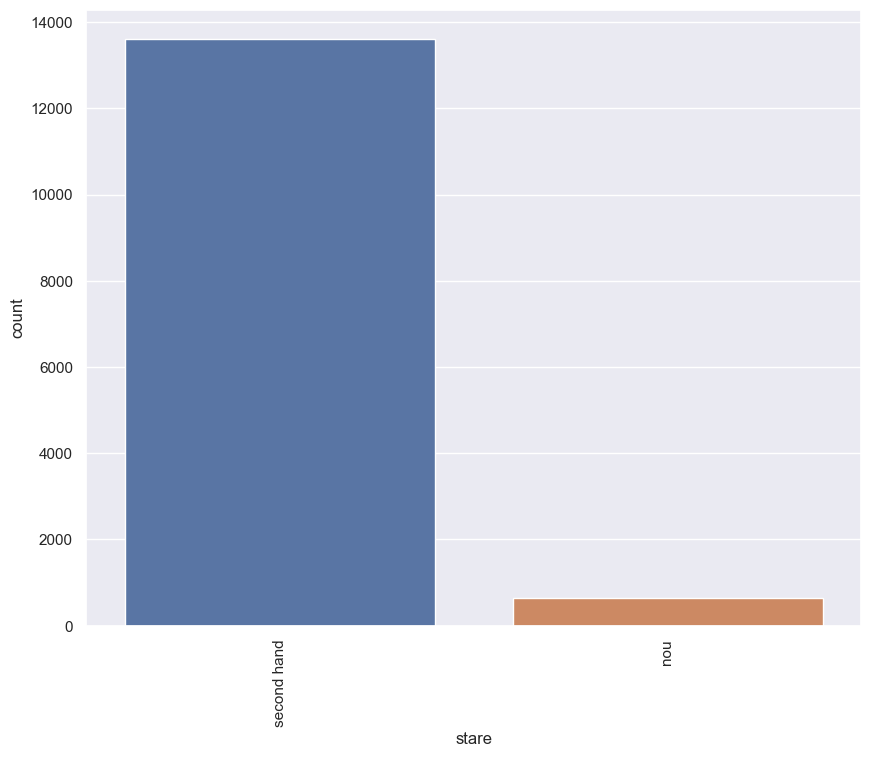

combustibil: combustibil
diesel            9091
benzina           3927
hibrid             805
hibrid plug-in     309
benzina + gpl      113
benzina + cng        7
Name: count, dtype: int64


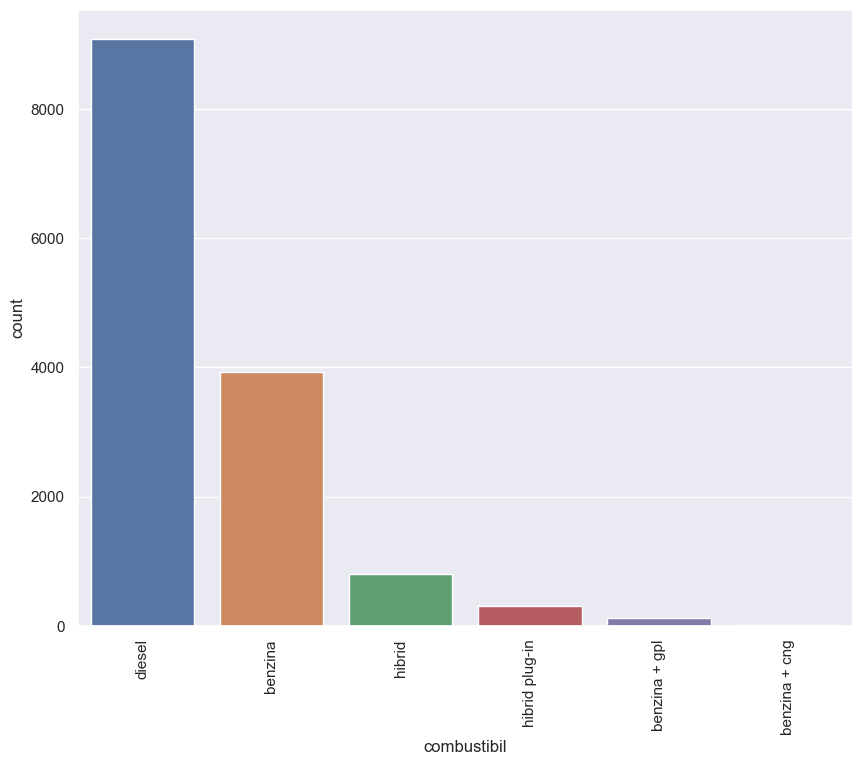

In [22]:
def plot_distribution_on_categorised_columns(df):
    columns = [
        "marca",
        "cutie de viteze",
        "tip caroserie",
        "stare",
        "combustibil",
    ]

    for column in columns:
        print(f"{column}: {df[column].value_counts(dropna=False)}")
        plt.figure(figsize=(10, 8))
        sns.countplot(x=column, data=df, order=df[column].value_counts().index)
        plt.xticks(rotation=90)
        plt.show()


plot_distribution_on_categorised_columns(df)

/opt/homebrew/Caskroom/miniconda/base/envs/core/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


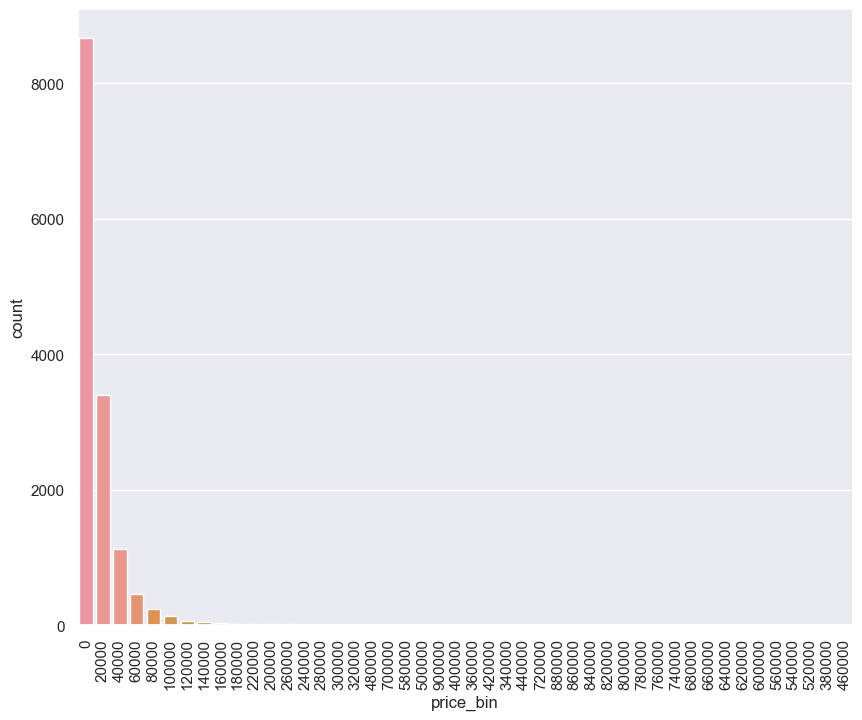

In [23]:
df["price_bin"] = pd.cut(df["price"], bins=np.arange(0, df["price"].max() + 20000, 20000), labels=np.arange(0, df["price"].max(), 20000))

plt.figure(figsize=(10, 8))
sns.countplot(x="price_bin", data=df, order=df["price_bin"].value_counts().index)
plt.xticks(rotation=90)
plt.show()

/var/folders/mb/36mmc1j57svg9l32_wd0bmlm0000gn/T/ipykernel_28425/3832584244.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["price_bin"] = pd.cut(df["price"], bins=np.arange(0, df["price"].max() + 5000, 5000), labels=np.arange(0, df["price"].max(), 5000))
/opt/homebrew/Caskroom/miniconda/base/envs/core/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


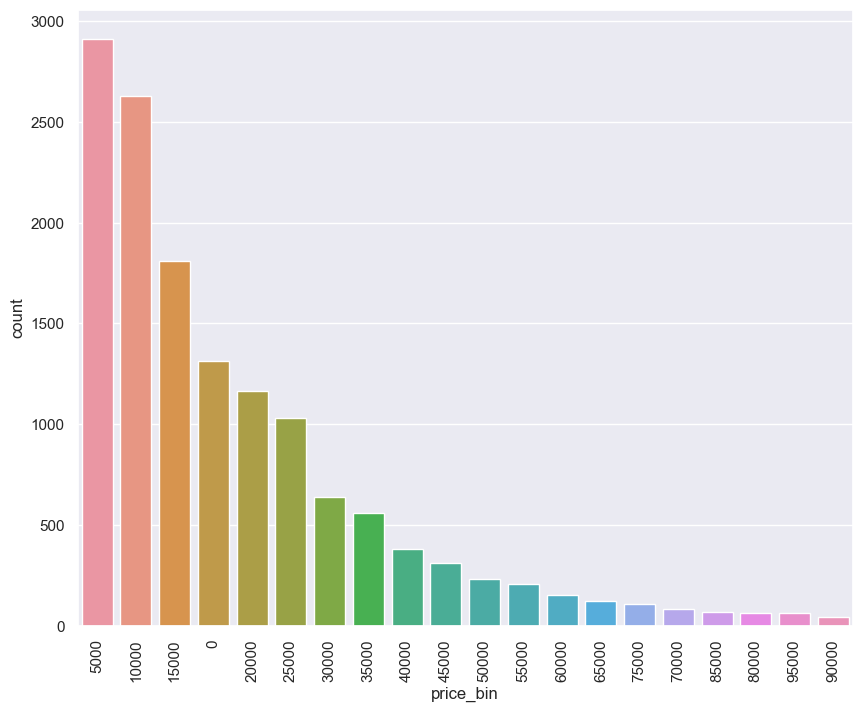

In [24]:
# remove outliers that are above 100k
df = df[df["price"] <= 100000]

# plot the distribution again but with 5k bins
df["price_bin"] = pd.cut(df["price"], bins=np.arange(0, df["price"].max() + 5000, 5000), labels=np.arange(0, df["price"].max(), 5000))

plt.figure(figsize=(10, 8))
sns.countplot(x="price_bin", data=df, order=df["price_bin"].value_counts().index)
plt.xticks(rotation=90)
plt.show()

In [25]:
def save_df_to_csv(df, path):
    df.to_csv(path, index=False)


save_df_to_csv(df, "trying.csv")

In [26]:
print(len(df))

13882
